# AIDM7330 Group Project_Elder Abuse in HK

## Introduction   
Because elder victims of abuse tend to be isolated and silent, the chance we can help them and  explore this issue is less.   Although there is not that much cases and information we can refer to, we still want to detect the problem and the truth behind.   
The primary data we used is the elder abuse cases list from 2005 to 2020 which invovled several important information like the type of elder abuse, residential district of elderly person being abused, the relationship between the victim and abuser and so on.  

In [1]:
%matplotlib inline

In [2]:
pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import warnings
import mapclassify
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', None)

## data cleaning and processing

In [5]:
# import HK map
hk = geopandas.GeoDataFrame.from_file('../data/hk.json')
hk['name'] = hk['name'].str.rstrip()
hk

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,810001,Central and Western,0,district,{'adcode': 810000},0,"MULTIPOLYGON (((114.17284 22.25231, 114.17339 ..."
1,810002,Wan Chai,0,district,{'adcode': 810000},1,"MULTIPOLYGON (((114.18628 22.28639, 114.18189 ..."
2,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ..."
3,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ..."
4,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ..."
5,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ..."
6,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ..."
7,810008,Wong Tai Sin,0,district,{'adcode': 810000},7,"MULTIPOLYGON (((114.20819 22.33252, 114.20934 ..."
8,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ..."
9,810010,Tsuen Wan,0,district,{'adcode': 810000},9,"MULTIPOLYGON (((114.14932 22.37451, 114.15404 ..."


In [6]:
#read and cleaning the data of nursing house
nursingHouse = pd.read_csv('../data/nursingHouse.csv')
nursingHouse['name'] = nursingHouse['name'].str.rstrip()
nursingHouse

,area,name,Subsidised Service-Subvented and Self-financing Home Operated by NGO,Subsidised Service-Contract Home,Subsidised Service-Private Home Participating in Enhanced Bought Place Scheme-EA1,Subsidised Service-Private Home Participating in Enhanced Bought Place Scheme-EA2,Non-Subsidised Service-Home Operated by NGO,Non-Subsidised Service-Contract Home,Non-Subsidised Service-Private Home,Total,Date
0,Hong Kong,Eastern,4,2,4,8,1,2,62,83,2020
1,Hong Kong,Wan Chai,2,1,2,1,2,1,18,27,2020
2,Hong Kong,Central and Western,2,3,7,4,1,3,26,46,2020
3,Hong Kong,Islands,3,2,0,0,0,2,6,13,2020
4,Hong Kong,Southern,10,0,5,4,4,0,26,49,2020
5,West Kowloon,Sham Shui Po,7,6,11,1,3,6,60,94,2020
6,West Kowloon,Kowloon City,4,1,18,5,4,1,67,100,2020
7,West Kowloon,Yau Tsim Mong,1,4,10,4,3,4,50,76,2020
8,East Kowloon,Wong Tai Sin,8,2,5,2,1,2,18,38,2020
9,East Kowloon,Sai Kung,10,0,0,0,7,0,6,23,2020


In [7]:
#read elderly population data
population = pd.read_csv('../data/elderPopulation_districts2020.csv')[0:18]
population['name'] = population['name'].str.strip()
population

,name,Population
0,Eastern,100400
1,Wan Chai,31600
2,Central and Western,42700
3,Islands,30200
4,Southern,46900
5,Sham Shui Po,74400
6,Kowloon City,73700
7,Yau Tsim Mong,54600
8,Wong Tai Sin,80600
9,Sai Kung,81200


In [8]:
#merge tables of HK geographic data and nursing house data
df = pd.merge(hk, nursingHouse,on = 'name')
df

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,area,Subsidised Service-Subvented and Self-financing Home Operated by NGO,Subsidised Service-Contract Home,Subsidised Service-Private Home Participating in Enhanced Bought Place Scheme-EA1,Subsidised Service-Private Home Participating in Enhanced Bought Place Scheme-EA2,Non-Subsidised Service-Home Operated by NGO,Non-Subsidised Service-Contract Home,Non-Subsidised Service-Private Home,Total,Date
0,810001,Central and Western,0,district,{'adcode': 810000},0,"MULTIPOLYGON (((114.17284 22.25231, 114.17339 ...",Hong Kong,2,3,7,4,1,3,26,46,2020
1,810002,Wan Chai,0,district,{'adcode': 810000},1,"MULTIPOLYGON (((114.18628 22.28639, 114.18189 ...",Hong Kong,2,1,2,1,2,1,18,27,2020
2,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ...",Hong Kong,4,2,4,8,1,2,62,83,2020
3,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ...",Hong Kong,10,0,5,4,4,0,26,49,2020
4,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ...",West Kowloon,1,4,10,4,3,4,50,76,2020
5,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ...",West Kowloon,7,6,11,1,3,6,60,94,2020
6,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ...",West Kowloon,4,1,18,5,4,1,67,100,2020
7,810008,Wong Tai Sin,0,district,{'adcode': 810000},7,"MULTIPOLYGON (((114.20819 22.33252, 114.20934 ...",East Kowloon,8,2,5,2,1,2,18,38,2020
8,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ...",East Kowloon,11,4,9,2,4,4,27,61,2020
9,810010,Tsuen Wan,0,district,{'adcode': 810000},9,"MULTIPOLYGON (((114.14932 22.37451, 114.15404 ...",New Territories West,7,2,10,1,2,2,19,43,2020


In [9]:
#merge tables of population
df = pd.merge(df,population,on = 'name')
#add the column of the number of nursing homes owned by each senior citizen
df['results'] = df.apply(lambda x: x['Total'] / x['Population'], axis=1)
df

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,area,Subsidised Service-Subvented and Self-financing Home Operated by NGO,Subsidised Service-Contract Home,Subsidised Service-Private Home Participating in Enhanced Bought Place Scheme-EA1,Subsidised Service-Private Home Participating in Enhanced Bought Place Scheme-EA2,Non-Subsidised Service-Home Operated by NGO,Non-Subsidised Service-Contract Home,Non-Subsidised Service-Private Home,Total,Date,Population,results
0,810001,Central and Western,0,district,{'adcode': 810000},0,"MULTIPOLYGON (((114.17284 22.25231, 114.17339 ...",Hong Kong,2,3,7,4,1,3,26,46,2020,42700,0.001077
1,810002,Wan Chai,0,district,{'adcode': 810000},1,"MULTIPOLYGON (((114.18628 22.28639, 114.18189 ...",Hong Kong,2,1,2,1,2,1,18,27,2020,31600,0.000854
2,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ...",Hong Kong,4,2,4,8,1,2,62,83,2020,100400,0.000827
3,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ...",Hong Kong,10,0,5,4,4,0,26,49,2020,46900,0.001045
4,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ...",West Kowloon,1,4,10,4,3,4,50,76,2020,54600,0.001392
5,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ...",West Kowloon,7,6,11,1,3,6,60,94,2020,74400,0.001263
6,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ...",West Kowloon,4,1,18,5,4,1,67,100,2020,73700,0.001357
7,810008,Wong Tai Sin,0,district,{'adcode': 810000},7,"MULTIPOLYGON (((114.20819 22.33252, 114.20934 ...",East Kowloon,8,2,5,2,1,2,18,38,2020,80600,0.000471
8,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ...",East Kowloon,11,4,9,2,4,4,27,61,2020,127700,0.000478
9,810010,Tsuen Wan,0,district,{'adcode': 810000},9,"MULTIPOLYGON (((114.14932 22.37451, 114.15404 ...",New Territories West,7,2,10,1,2,2,19,43,2020,52200,0.000824


In [10]:
#read the data of abuse cases
abuse = pd.read_csv('../data/abuse.csv')
abuse = abuse.rename(columns={'Item': 'name'})
abuse['name'] = abuse['name'].str.rstrip()
abuse['name'] = abuse['name'].str.lstrip()
abuse

,Year,Category,name,No. of Cases
0,2005,Type of Elder Abuse,Physical abuse,390
1,2005,Type of Elder Abuse,Psychological abuse,26
2,2005,Type of Elder Abuse,Neglect,3
3,2005,Type of Elder Abuse,Financial abuse,87
4,2005,Type of Elder Abuse,Abandonment,1
5,2005,Type of Elder Abuse,Sexual abuse,1
6,2005,Type of Elder Abuse,Others,0
7,2005,Type of Elder Abuse,Multiple abuse,20
8,2005,Type of Elder Abuse and Sex of Elderly Person ...,Physical abuse - Male,200
9,2005,Type of Elder Abuse and Sex of Elderly Person ...,Psychological abuse - Male,15


In [11]:
#read the data of poverty rate
df2 = pd.read_csv('../data/poorRate.csv')
df2['name'] = df2['name'].str.rstrip()
df2

,Year,name,poverty rate
0,2020,Central and Western,9.9
1,2020,Wan Chai,10.9
2,2020,Eastern,7.9
3,2020,Southern,6.1
4,2020,Yau Tsim Mong,10.7
5,2020,Sham Shui Po,6.7
6,2020,Kowloon City,8.8
7,2020,Wong Tai Sin,7.1
8,2020,Kwun Tong,5.5
9,2020,Kwai Tsing,5.5


In [12]:
#read the geographic table
geo = pd.read_csv('../data/lon.csv')
geo['name'] = geo['name'].str.rstrip()
geo

,name,lat,lon
0,Eastern,22.270314,114.227107
1,Wan Chai,22.266406,114.189433
2,Central and Western,22.274164,114.152342
3,Islands,22.260175,113.944813
4,Southern,22.232930,114.206983
5,Sham Shui Po,22.328966,114.156935
6,Kowloon City,22.314545,114.197767
7,Yau Tsim Mong,22.303469,114.172222
8,Wong Tai Sin,22.341657,114.209740
9,Sai Kung,22.314213,114.264645


## visualization

## Q1：  What type of abuse are the elder most suffered in different years?
### Method  
Quantity and trend comparison.

### Approach   
We draw two charts to describe the number of each type of elder abuse in different years and show the trend of the change.

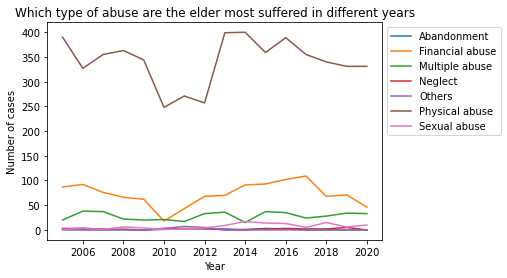

In [13]:
#Select the data of type of abuse are the elder most suffered in different years 
abuse_1 = abuse.loc[abuse['name'].isin(['Physical abuse', 'Psychological abuse ', 'Neglect', 
                                        'Financial abuse', 'Abandonment','Sexual abuse',
                                        'Others','Multiple abuse'])]
abuse_1 = abuse_1[(abuse_1['Category'].isin(['Type of Elder Abuse']))]
abuse_1_pivot = abuse_1.pivot_table(values = 'No. of Cases', columns = 'name', index = 'Year')
abuse_1_pivot.plot(title = 'Which type of abuse are the elder most suffered in different years',
                   xlabel='Year',ylabel='Number of cases')
plt.legend(bbox_to_anchor=(1.0, 1.0) )
plt.show()

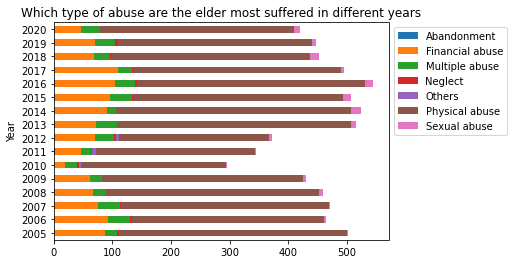

In [14]:
abuse_1_pivot.plot.barh(stacked=True,title = 'Which type of abuse are the elder most suffered in different years',xlabel='Year',ylabel='Number of cases');
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Findings 
(1) Physical abuse is the most kind of abuse that the elder suffered and the following is the psychological abuse and financial abuse in 16 years.   
(2) In addition, we can immediately see that here is a dramatic increase of the number of psychological abuse cases in the year 2008. And then it fluctuates between 50 and 100, so was the number of financial abuse, although it was always higher after the year 2013.

## Q2: What type of abuse do male and female elderly suffer most in different years?
### Method 
Quantity and trend comparison.  

### Approach 
We draw two group graphs to specify the number of different kinds of cases between two genders.

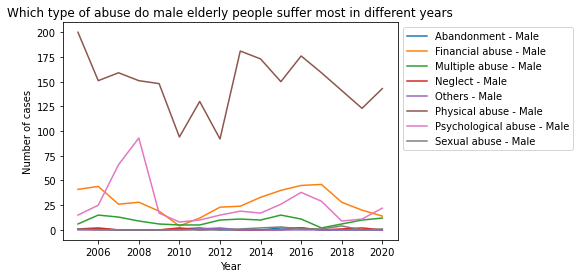

In [15]:
#Select the data of type of elder abuse and sex of elderly person being abused 
abuse1_1 = abuse.loc[abuse['name'].isin(['Physical abuse - Male', 'Psychological abuse - Male', 'Neglect - Male', 'Financial abuse - Male', 'Abandonment - Male','Sexual abuse - Male', 'Others - Male','Multiple abuse - Male'])]
abuse1_1 = abuse1_1[(abuse1_1['Category'].isin(['Type of Elder Abuse and Sex of Elderly Person Being Abused']))]
abuse1_1_pivot = abuse1_1.pivot_table(values = 'No. of Cases', columns = 'name', index = 'Year')
abuse1_1_pivot.plot(title = 'Which type of abuse do male elderly people suffer most in different years',xlabel='Year',ylabel='Number of cases')
plt.legend(bbox_to_anchor=(1.0, 1.0) )
plt.show()

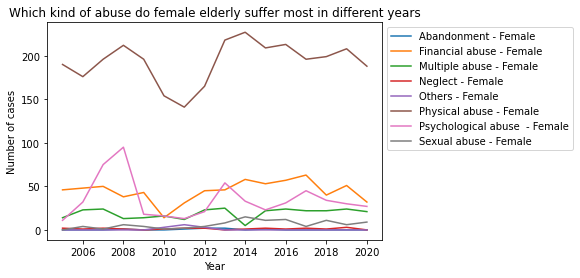

In [16]:
abuse1_2 = abuse.loc[abuse['name'].isin(['Physical abuse - Female', 'Psychological abuse  - Female', 'Neglect - Female', 'Financial abuse - Female', 'Abandonment - Female','Sexual abuse - Female', 'Others - Female','Multiple abuse - Female'])]
abuse1_2 = abuse1_2[(abuse1_2['Category'].isin(['Type of Elder Abuse and Sex of Elderly Person Being Abused']))]
abuse1_2_pivot = abuse1_2.pivot_table(values = 'No. of Cases', columns = 'name', index = 'Year')
abuse1_2_pivot.plot(title = 'Which kind of abuse do female elderly suffer most in different years',xlabel='Year',ylabel='Number of cases')
plt.legend(bbox_to_anchor=(1.0, 1.0) )
plt.show()

### Findings 
(1) Both the male and the female elderly are most likely to be physically abused.   
(2) Many male old people suffered psychological abuse in the year 2008.   
(3) Financial abuse and multiple abuse are also common scenario among female elder abuse cases.     
(4) Female elderly is more likely to suffer sexual abuse than male.  

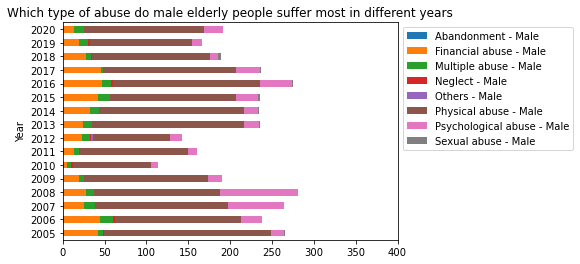

In [17]:
abuse1_1_pivot.plot.barh(stacked=True,title = 'Which type of abuse do male elderly people suffer most in different years',xlabel='Year',ylabel='Number of cases');
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim(0,400)
plt.show()

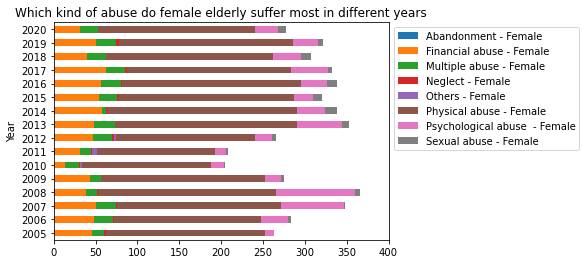

In [18]:
abuse1_2_pivot.plot.barh(stacked=True,title = 'Which kind of abuse do female elderly suffer most in different years',xlabel='Year',ylabel='Number of cases');
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim(0,400)
plt.show()

### Findings
(1) The number of cases that female elder people suffered physical abuse is the largest among all kinds of cases.  
(2) More female elder people suffer physical abuse and sexual abuse than male.   
(3) Basically, the female elderly are more likely to be abused than male in all types of elder abuse.



## Q3: Who is most likely to abuse the elder?
### Method
Quantity and trend comparison.  

### Approach 
We draw two charts to show the total number of elder abuse cases for each year based on different relationships between victims and abusers. 

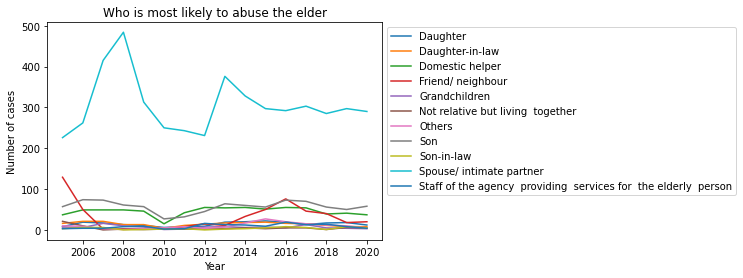

In [19]:
#Select the data of abuser's relationship with elderly person being abused 
abuse_2 = abuse.loc[abuse['name'].isin(['Son', 'Daughter', 'Son-in-law', 'Daughter-in-law', 'Spouse/ intimate partner','Grandchildren', 'Friend/ neighbour','Not relative but living  together', 'Domestic helper','Staff of the agency  providing  services for  the elderly  person', 'Others'])]
abuse_2 = abuse_2[(abuse_2['Category'].isin(['Abuser\'s Relationship with Elderly Person Being Abused']))]
abuse_2_pivot = abuse_2.pivot_table(values = 'No. of Cases', columns = 'name', index = 'Year')
abuse_2_pivot.plot(title = 'Who is most likely to abuse the elder',xlabel='Year',ylabel='Number of cases')
plt.legend(bbox_to_anchor=(1.0, 1.0) )
plt.show()

### Findings  
(1) It is easy to find that spouses/intimate partners are most likely to abuse the old. To be specific,  the most cases had been found that around 500 elder people were abused by their spouse in the year 2008.  
(2) Elder people's son is also likely to treat their parents badly and the following is the domestic helper.  
(3) Elder people are less likely to be neglected.   

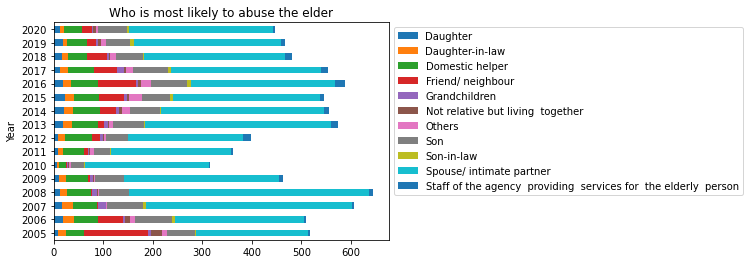

In [20]:
abuse_2_pivot.plot.barh(stacked=True,title = 'Who is most likely to abuse the elder',xlabel='Year',ylabel='Number of cases');
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Findings
(4) The male elderly are most likey to be physically abused.   
(5) Many male old people suffered psychological abuse in the year 2008.

## Q4: Does the number of nursing homes affect the number of elder abuse cases which is based on different areas?

### Methods
Compare the number of nursing house with the cases numbers in Hong Kong's different districts in 2020

### Approach
First, we collected and imported the dataset of Hong Kong map, nursing house and abuse cases. Then, we use geopandas to merge the nursing house with the Hong Kong map. At last, we plot a geograph with this dataset. We use the shade of red to represent the nursing house availability from different districts by using the nursing room numbers divided by the total elderly population. Besides, we put the yellow circle with different sizes to represent the abuse rate by using the abuse cases numbers divided by the elder population different districts.


Text(0, 0.5, 'The number of nursing houses')

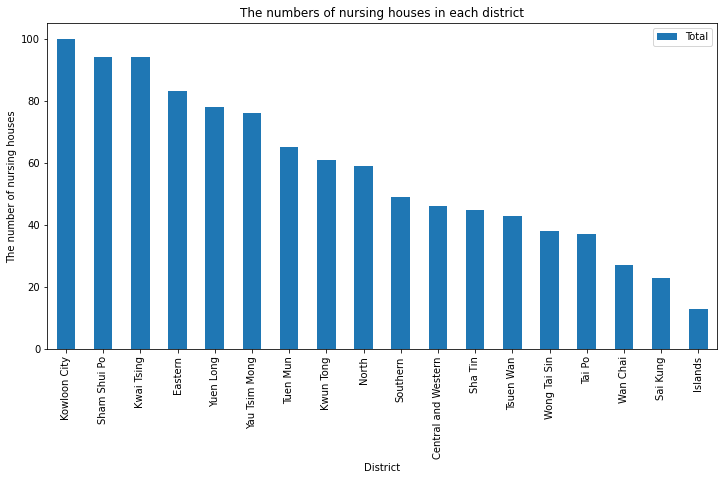

In [21]:
#bar plot
df.sort_values(by='Total',inplace=True,ascending=False)
df.plot.bar(figsize = (12,6),x = 'name',y = 'Total',title = 'The numbers of nursing houses in each district')
plt.xlabel('District')
plt.ylabel('The number of nursing houses')

In [22]:
#select the data of abuse cases in 2020
abuse1 = abuse[(abuse['Year'] == 2020)&(abuse['Category'] == 'Residential District of Elderly Person Being Abused')]
abuse1 = abuse1.rename(columns={'No. of Cases': 'cases'})
abuse1

,Year,Category,name,cases
861,2020,Residential District of Elderly Person Being A...,Central and Western,13
862,2020,Residential District of Elderly Person Being A...,Southern,10
863,2020,Residential District of Elderly Person Being A...,Islands,4
864,2020,Residential District of Elderly Person Being A...,Eastern,45
865,2020,Residential District of Elderly Person Being A...,Wan Chai,6
866,2020,Residential District of Elderly Person Being A...,Kowloon City,14
867,2020,Residential District of Elderly Person Being A...,Yau Tsim Mong,12
868,2020,Residential District of Elderly Person Being A...,Sham Shui Po,22
869,2020,Residential District of Elderly Person Being A...,Wong Tai Sin,32
870,2020,Residential District of Elderly Person Being A...,Sai Kung,21


In [23]:
geo1 = pd.merge(abuse1,geo,on = 'name')
geo1

,Year,Category,name,cases,lat,lon
0,2020,Residential District of Elderly Person Being A...,Central and Western,13,22.274164,114.152342
1,2020,Residential District of Elderly Person Being A...,Southern,10,22.232930,114.206983
2,2020,Residential District of Elderly Person Being A...,Islands,4,22.260175,113.944813
3,2020,Residential District of Elderly Person Being A...,Eastern,45,22.270314,114.227107
4,2020,Residential District of Elderly Person Being A...,Wan Chai,6,22.266406,114.189433
5,2020,Residential District of Elderly Person Being A...,Kowloon City,14,22.314545,114.197767
6,2020,Residential District of Elderly Person Being A...,Yau Tsim Mong,12,22.303469,114.172222
7,2020,Residential District of Elderly Person Being A...,Sham Shui Po,22,22.328966,114.156935
8,2020,Residential District of Elderly Person Being A...,Wong Tai Sin,32,22.341657,114.209740
9,2020,Residential District of Elderly Person Being A...,Sai Kung,21,22.314213,114.264645


In [24]:
geo1 = pd.merge(df,geo1,on='name')
geo1

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,area,Subsidised Service-Subvented and Self-financing Home Operated by NGO,Subsidised Service-Contract Home,...,Non-Subsidised Service-Private Home,Total,Date,Population,results,Year,Category,cases,lat,lon
0,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ...",West Kowloon,4,1,...,67,100,2020,73700,0.001357,2020,Residential District of Elderly Person Being A...,14,22.314545,114.197767
1,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ...",West Kowloon,7,6,...,60,94,2020,74400,0.001263,2020,Residential District of Elderly Person Being A...,22,22.328966,114.156935
2,810017,Kwai Tsing,0,district,{'adcode': 810000},16,"MULTIPOLYGON (((114.08261 22.32938, 114.08509 ...",New Territories West,14,4,...,49,94,2020,92100,0.001021,2020,Residential District of Elderly Person Being A...,70,22.341750,114.118692
3,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ...",Hong Kong,4,2,...,62,83,2020,100400,0.000827,2020,Residential District of Elderly Person Being A...,45,22.270314,114.227107
4,810012,Yuen Long,0,district,{'adcode': 810000},11,"MULTIPOLYGON (((114.12926 22.41381, 114.12967 ...",New Territories East,8,2,...,41,78,2020,107400,0.000726,2020,Residential District of Elderly Person Being A...,46,22.445964,114.047174
5,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ...",West Kowloon,1,4,...,50,76,2020,54600,0.001392,2020,Residential District of Elderly Person Being A...,12,22.303469,114.172222
6,810011,Tuen Mun,0,district,{'adcode': 810000},10,"MULTIPOLYGON (((114.07215 22.38602, 114.07191 ...",New Territories West,9,1,...,36,65,2020,85200,0.000763,2020,Residential District of Elderly Person Being A...,34,22.388499,113.979886
7,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ...",East Kowloon,11,4,...,27,61,2020,127700,0.000478,2020,Residential District of Elderly Person Being A...,47,22.309542,114.230773
8,810013,North,0,district,{'adcode': 810000},12,"MULTIPOLYGON (((114.34198 22.50784, 114.34188 ...",New Territories East,10,0,...,40,59,2020,53100,0.001111,2020,Residential District of Elderly Person Being A...,22,22.510784,114.182122
9,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ...",Hong Kong,10,0,...,26,49,2020,46900,0.001045,2020,Residential District of Elderly Person Being A...,10,22.232930,114.206983


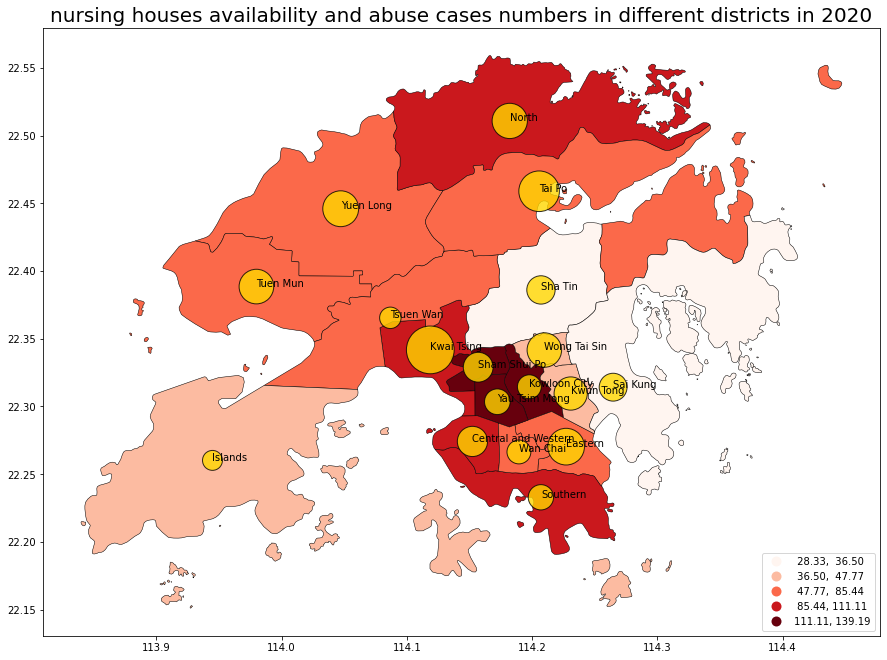

In [25]:
plt.figure(figsize=(15,15))
plt.title('nursing houses availability and abuse cases numbers in different districts in 2020', fontsize = 20)
df.plot(ax = plt.subplot(1,1,1),
         alpha=1,
         edgecolor='k', 
         linewidth = 0.5,
         legend=True,
         legend_kwds = dict(loc = 'lower right'),
         scheme = 'FisherJenks', 
         column=df['results']*100000, 
         cmap = 'Reds')
plt.scatter(geo1.lon,geo1.lat, sizes = (geo1['cases']/geo1['Population'])*3000000, color = 'gold',edgecolors='k', alpha = 0.8)
lst = geo1[['name','lon','lat']].to_dict(orient = 'record')
for i in lst:
    plt.text(i['lon'], i['lat'], i['name'])

### Findings
Overall, we can see that if there are more nursing houses available, the elderly abuse cases will be relatively low. For example, we can see that in Sham Shui Po, Yau Tsim Mong and Kowloon Ciry, the number of nursing houses for each elderly people are the higher than those in Wong Tai Sin and Kwan Tong, so the elderly abuse cases in Sham Shui Po, Yau Tsim Mong and Tsim Kowloon city are lower than Wong Tai Sin and Kwan Tong. It is also the same for Central and Western, and Southern, compared to the Wan-Chai and Easterm. 

However, as for Islands, the nursing houses are not many as it is light red, However, the elderly abuse cases are also not many. On the contary, in Kwai Tong, the elderly abuse cases ranked first even if the nursing houses availability is also high in Kwai Tong.




## Q5: Is the elder abuse happening area related to that area’s economy?


### Methods
Compare the poverty rate with the elderly abuse cases numbers in Hong Kong's different districts.

### Approach
We collected and imported the dataset of Hong Kong map, poverty rate and abuse cases. We plot a scatter chart and a geograph to answer this question. 

In the first scatter plot, each point represents one year, x axis represents poverty rate, and y axis represents cases numbers. We want to see if there is correlation between poverty rate and cases numbers, if there are, the red points should be shown like a positive slope. 

In the second geograph, we choose the data from 2020 to plot a geograph. We use the shade of blue to represent the poverty rate of each district. The darker the blue is, the poorer the district is. We also put grey points according to the abuse rate by using the abuse cases numbers divided by the elder population in different districts.

In [26]:
df1 = abuse[abuse['Category'] == 'Residential District of Elderly Person Being Abused']
df1

,Year,Category,name,No. of Cases
36,2005,Residential District of Elderly Person Being A...,Central and Western,19
37,2005,Residential District of Elderly Person Being A...,Southern,19
38,2005,Residential District of Elderly Person Being A...,Islands,7
39,2005,Residential District of Elderly Person Being A...,Eastern,42
40,2005,Residential District of Elderly Person Being A...,Wan Chai,10
41,2005,Residential District of Elderly Person Being A...,Kowloon City,33
42,2005,Residential District of Elderly Person Being A...,Yau Tsim Mong,29
43,2005,Residential District of Elderly Person Being A...,Sham Shui Po,25
44,2005,Residential District of Elderly Person Being A...,Wong Tai Sin,43
45,2005,Residential District of Elderly Person Being A...,Sai Kung,11


In [27]:
df2

,Year,name,poverty rate
0,2020,Central and Western,9.9
1,2020,Wan Chai,10.9
2,2020,Eastern,7.9
3,2020,Southern,6.1
4,2020,Yau Tsim Mong,10.7
5,2020,Sham Shui Po,6.7
6,2020,Kowloon City,8.8
7,2020,Wong Tai Sin,7.1
8,2020,Kwun Tong,5.5
9,2020,Kwai Tsing,5.5


In [28]:
df3 = pd.merge(df1,df2,on = ['name','Year'])
df3

,Year,Category,name,No. of Cases,poverty rate
0,2012,Residential District of Elderly Person Being A...,Central and Western,18,11.4
1,2012,Residential District of Elderly Person Being A...,Southern,15,11.8
2,2012,Residential District of Elderly Person Being A...,Islands,6,14.3
3,2012,Residential District of Elderly Person Being A...,Eastern,24,13.0
4,2012,Residential District of Elderly Person Being A...,Wan Chai,4,12.4
5,2012,Residential District of Elderly Person Being A...,Kowloon City,16,13.1
6,2012,Residential District of Elderly Person Being A...,Yau Tsim Mong,21,15.7
7,2012,Residential District of Elderly Person Being A...,Sham Shui Po,26,18.8
8,2012,Residential District of Elderly Person Being A...,Wong Tai Sin,31,18.7
9,2012,Residential District of Elderly Person Being A...,Sai Kung,6,10.7


In [29]:
#scatter plot about abuse cases and poverty rate
districts = df3.groupby('name').size()
print(districts.index)
numDistricts = len(districts)
print('num of districts:',numDistricts) 

Index(['Central and Western', 'Eastern', 'Islands', 'Kowloon City',
       'Kwai Tsing', 'Kwun Tong', 'North', 'Sai Kung', 'Sha Tin',
       'Sham Shui Po', 'Southern', 'Tai Po', 'Tsuen Wan', 'Tuen Mun',
       'Wan Chai', 'Wong Tai Sin', 'Yau Tsim Mong', 'Yuen Long'],
      dtype='object', name='name')
num of districts: 18


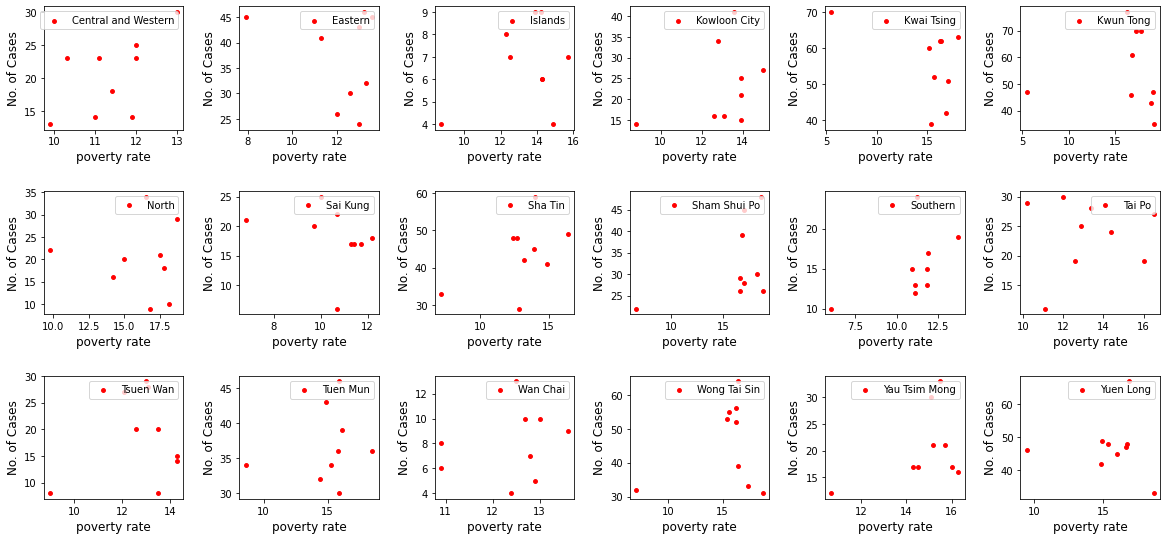

In [30]:
fig = plt.figure(figsize=(20,60)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
n = 1
for d in districts.index:
    ax = fig.add_subplot(numDistricts,6,n) 
    y = df3[df3['name'] == d]['No. of Cases']
    x = df3[df3['name'] == d]['poverty rate']
    ax.scatter(x,y,s=15,c = 'red')
    ax.set_ylabel('No. of Cases',fontsize=12)
    ax.set_xlabel('poverty rate',fontsize=12)
    ax.legend([d],loc = 'upper right') 
    n = n+1
plt.show()

### Findings
In the scatter plot, there is no clear positive slope, so the correlation is not very strong.

But it is notable that when poverty rate is above 10%, then the cases of most districts are both relatviely low.

In [31]:
#choose the data of 2020
df4 = df3[df3['Year'] == 2020]
df4

,Year,Category,name,No. of Cases,poverty rate
144,2020,Residential District of Elderly Person Being A...,Central and Western,13,9.9
145,2020,Residential District of Elderly Person Being A...,Southern,10,6.1
146,2020,Residential District of Elderly Person Being A...,Islands,4,8.7
147,2020,Residential District of Elderly Person Being A...,Eastern,45,7.9
148,2020,Residential District of Elderly Person Being A...,Wan Chai,6,10.9
149,2020,Residential District of Elderly Person Being A...,Kowloon City,14,8.8
150,2020,Residential District of Elderly Person Being A...,Yau Tsim Mong,12,10.7
151,2020,Residential District of Elderly Person Being A...,Sham Shui Po,22,6.7
152,2020,Residential District of Elderly Person Being A...,Wong Tai Sin,32,7.1
153,2020,Residential District of Elderly Person Being A...,Sai Kung,21,6.8


In [32]:
hk

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,810001,Central and Western,0,district,{'adcode': 810000},0,"MULTIPOLYGON (((114.17284 22.25231, 114.17339 ..."
1,810002,Wan Chai,0,district,{'adcode': 810000},1,"MULTIPOLYGON (((114.18628 22.28639, 114.18189 ..."
2,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ..."
3,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ..."
4,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ..."
5,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ..."
6,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ..."
7,810008,Wong Tai Sin,0,district,{'adcode': 810000},7,"MULTIPOLYGON (((114.20819 22.33252, 114.20934 ..."
8,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ..."
9,810010,Tsuen Wan,0,district,{'adcode': 810000},9,"MULTIPOLYGON (((114.14932 22.37451, 114.15404 ..."


In [33]:
#merge table of geographical data and others
df5 = pd.merge(hk, df4,on = 'name',how = 'inner')
df5

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,Year,Category,No. of Cases,poverty rate
0,810001,Central and Western,0,district,{'adcode': 810000},0,"MULTIPOLYGON (((114.17284 22.25231, 114.17339 ...",2020,Residential District of Elderly Person Being A...,13,9.9
1,810002,Wan Chai,0,district,{'adcode': 810000},1,"MULTIPOLYGON (((114.18628 22.28639, 114.18189 ...",2020,Residential District of Elderly Person Being A...,6,10.9
2,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ...",2020,Residential District of Elderly Person Being A...,45,7.9
3,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ...",2020,Residential District of Elderly Person Being A...,10,6.1
4,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ...",2020,Residential District of Elderly Person Being A...,12,10.7
5,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ...",2020,Residential District of Elderly Person Being A...,22,6.7
6,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ...",2020,Residential District of Elderly Person Being A...,14,8.8
7,810008,Wong Tai Sin,0,district,{'adcode': 810000},7,"MULTIPOLYGON (((114.20819 22.33252, 114.20934 ...",2020,Residential District of Elderly Person Being A...,32,7.1
8,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ...",2020,Residential District of Elderly Person Being A...,47,5.5
9,810010,Tsuen Wan,0,district,{'adcode': 810000},9,"MULTIPOLYGON (((114.14932 22.37451, 114.15404 ...",2020,Residential District of Elderly Person Being A...,8,9.0


In [34]:
geo2 = pd.merge(df5,population, on = 'name')
geo2 = pd.merge(geo2,geo, on = 'name')
geo2

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,Year,Category,No. of Cases,poverty rate,Population,lat,lon
0,810001,Central and Western,0,district,{'adcode': 810000},0,"MULTIPOLYGON (((114.17284 22.25231, 114.17339 ...",2020,Residential District of Elderly Person Being A...,13,9.9,42700,22.274164,114.152342
1,810002,Wan Chai,0,district,{'adcode': 810000},1,"MULTIPOLYGON (((114.18628 22.28639, 114.18189 ...",2020,Residential District of Elderly Person Being A...,6,10.9,31600,22.266406,114.189433
2,810003,Eastern,0,district,{'adcode': 810000},2,"MULTIPOLYGON (((114.20449 22.25230, 114.20715 ...",2020,Residential District of Elderly Person Being A...,45,7.9,100400,22.270314,114.227107
3,810004,Southern,0,district,{'adcode': 810000},3,"MULTIPOLYGON (((114.12249 22.26834, 114.12383 ...",2020,Residential District of Elderly Person Being A...,10,6.1,46900,22.232930,114.206983
4,810005,Yau Tsim Mong,0,district,{'adcode': 810000},4,"MULTIPOLYGON (((114.15436 22.31151, 114.15444 ...",2020,Residential District of Elderly Person Being A...,12,10.7,54600,22.303469,114.172222
5,810006,Sham Shui Po,0,district,{'adcode': 810000},5,"MULTIPOLYGON (((114.15436 22.31151, 114.15419 ...",2020,Residential District of Elderly Person Being A...,22,6.7,74400,22.328966,114.156935
6,810007,Kowloon City,0,district,{'adcode': 810000},6,"MULTIPOLYGON (((114.18431 22.34598, 114.18354 ...",2020,Residential District of Elderly Person Being A...,14,8.8,73700,22.314545,114.197767
7,810008,Wong Tai Sin,0,district,{'adcode': 810000},7,"MULTIPOLYGON (((114.20819 22.33252, 114.20934 ...",2020,Residential District of Elderly Person Being A...,32,7.1,80600,22.341657,114.209740
8,810009,Kwun Tong,0,district,{'adcode': 810000},8,"MULTIPOLYGON (((114.20819 22.33252, 114.20817 ...",2020,Residential District of Elderly Person Being A...,47,5.5,127700,22.309542,114.230773
9,810010,Tsuen Wan,0,district,{'adcode': 810000},9,"MULTIPOLYGON (((114.14932 22.37451, 114.15404 ...",2020,Residential District of Elderly Person Being A...,8,9.0,52200,22.365421,114.086798


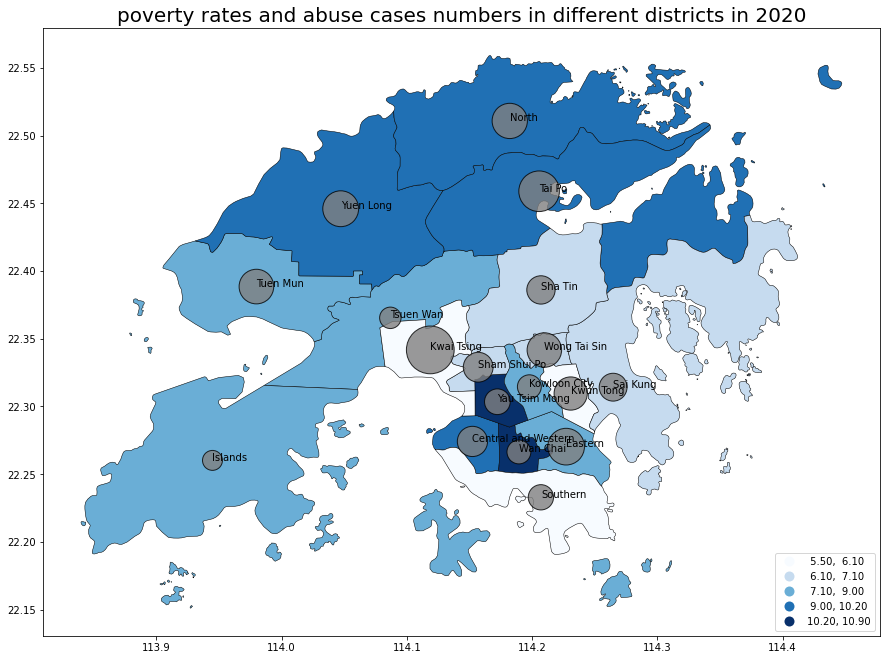

In [35]:
#map of poverty rate and the number of abuse cases
plt.figure(figsize=(15,15))
plt.title('poverty rates and abuse cases numbers in different districts in 2020', fontsize = 20)
df5.plot(ax=plt.subplot(1,1,1),
         alpha=1,
         edgecolor='k', 
         linewidth = 0.5,
         legend=True,
         legend_kwds = dict(loc = 'lower right'),
         scheme = 'FisherJenks', 
         column='poverty rate', 
         cmap = 'Blues')
plt.scatter(geo2.lon,geo2.lat,
            s = (geo2['No. of Cases']/geo2['Population'])*3000000, c = 'grey',edgecolors='k', alpha = 0.8)
lst = geo2[['name','lon','lat']].to_dict(orient = 'record')
for i in lst:
    plt.text(i['lon'], i['lat'], i['name'])
ax.set_axis_off()


In the second geograph, there is also no clear correlation between the poverty rate and the abuse rate.
In Kwai Tong, the poverty rate is lowest while its elderly abuse cases ranked the first.
As for Wan Chai, this plot shows that it is one of the poorest district. However, its abusing cases are one of the lowest among Hong Kong.